In [1]:
import cv2
import numpy as np
input_dir = 'dataset/test'
output_dir = 'dataset/output'
groundtruth_dir = 'dataset/groundtruth'

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
image_no = '048'

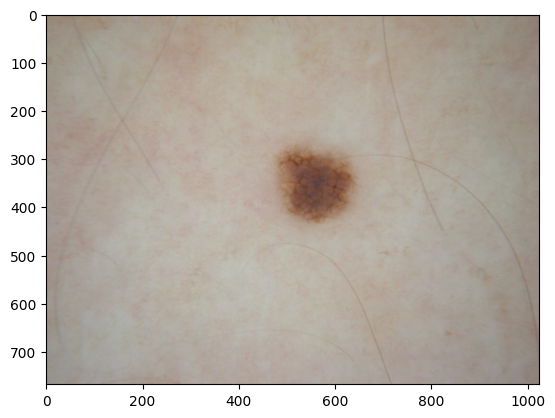

In [19]:
img = cv2.imread(input_dir + f'/SL_{image_no}.jpg')
img_ground = cv2.imread(groundtruth_dir + f'/SL_GT_{image_no}.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img_rgb)
plt.show()

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Reduce noise
blur = cv2.GaussianBlur(img,(7,7),0)
img_contrast = cv2.convertScaleAbs(blur, alpha=1.2, beta=10)

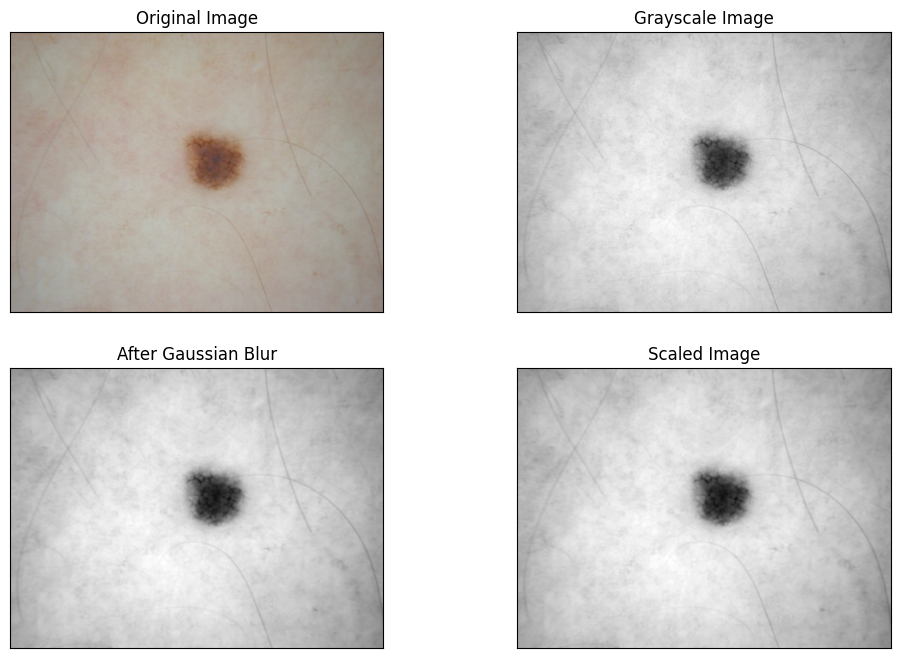

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(221), plt.imshow(img_rgb,cmap='gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(img,cmap='gray')
plt.title('Grayscale Image')
plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(blur,cmap='gray')
plt.title('After Gaussian Blur')
plt.xticks([]),plt.yticks([])

plt.subplot(224), plt.imshow(img_contrast,cmap='gray')
plt.title('Scaled Image')
plt.xticks([]),plt.yticks([])
plt.show()

In [22]:
ret,binary = cv2.threshold(img_contrast,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

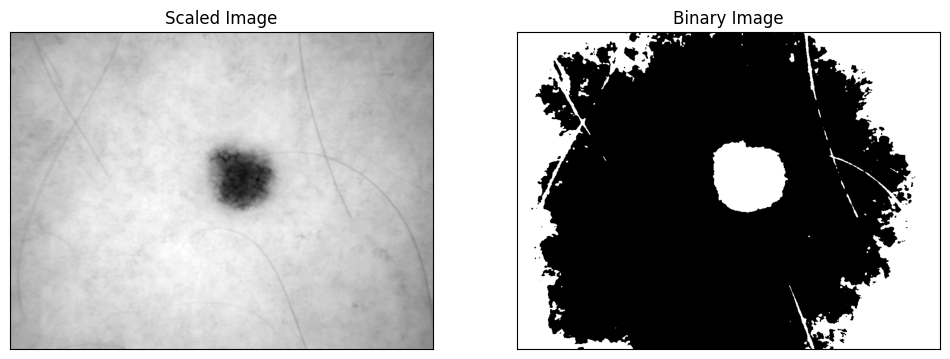

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img_contrast,cmap='gray')
plt.title('Scaled Image')
plt.xticks([]),plt.yticks([])

plt.subplot(122), plt.imshow(binary,cmap='gray')
plt.title('Binary Image')
plt.xticks([]),plt.yticks([])
plt.show()

In [24]:
# Flood fill to remove border image mask
thresh = binary.copy()
h, w = img.shape[:2]
for row in range(h):
    if thresh[row, 0] == 255:
        cv2.floodFill(thresh, None, (0, row), 0)
    if thresh[row, w-1] == 255:
        cv2.floodFill(thresh, None, (w-1, row), 0)
for col in range(w):
    if thresh[0, col] == 255:
        cv2.floodFill(thresh, None, (col, 0), 0)
    if thresh[h-1, col] == 255:
        cv2.floodFill(thresh, None, (col, h-1), 0)

# Flood fill background to find inner holes
holes = thresh.copy()
cv2.floodFill(holes, None, (0, 0), 255)

# invert holes thresh, bitwise or with thresh to fill in holes
holes = cv2.bitwise_not(holes)
filled_mask = cv2.bitwise_or(thresh, holes)

In [25]:
cnts, _ = cv2.findContours(filled_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = max(cnts, key=cv2.contourArea)

out = np.zeros(filled_mask.shape, np.uint8)
cv2.drawContours(out, [cnt], -1, 255, cv2.FILLED)
ctr_mask = cv2.bitwise_and(filled_mask, out)
# plt.imshow(ctr_mask,cmap='gray')
# plt.show()

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(ctr_mask,kernel,iterations = 5)
# plt.imshow(dilation,cmap='gray')
# plt.show()

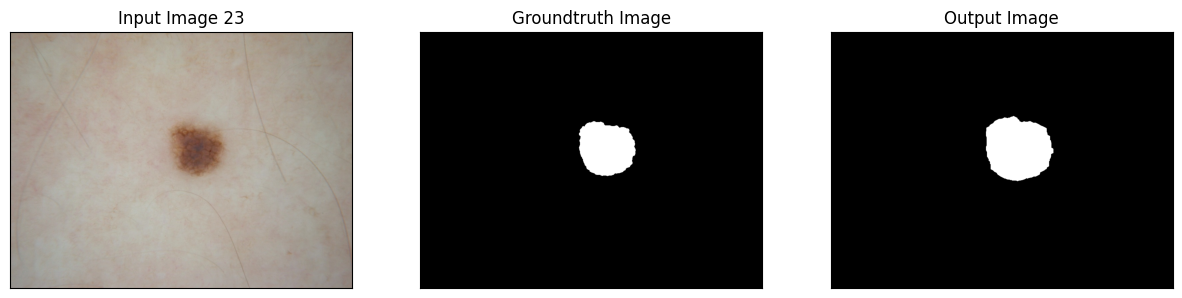

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(img_rgb,cmap='gray')
plt.title('Input Image 23')
plt.xticks([]),plt.yticks([])

plt.subplot(132), plt.imshow(img_ground,cmap='gray')
plt.title('Groundtruth Image')
plt.xticks([]),plt.yticks([])

plt.subplot(133), plt.imshow(dilation,cmap='gray')
plt.title('Output Image')
plt.xticks([]),plt.yticks([])
plt.show()

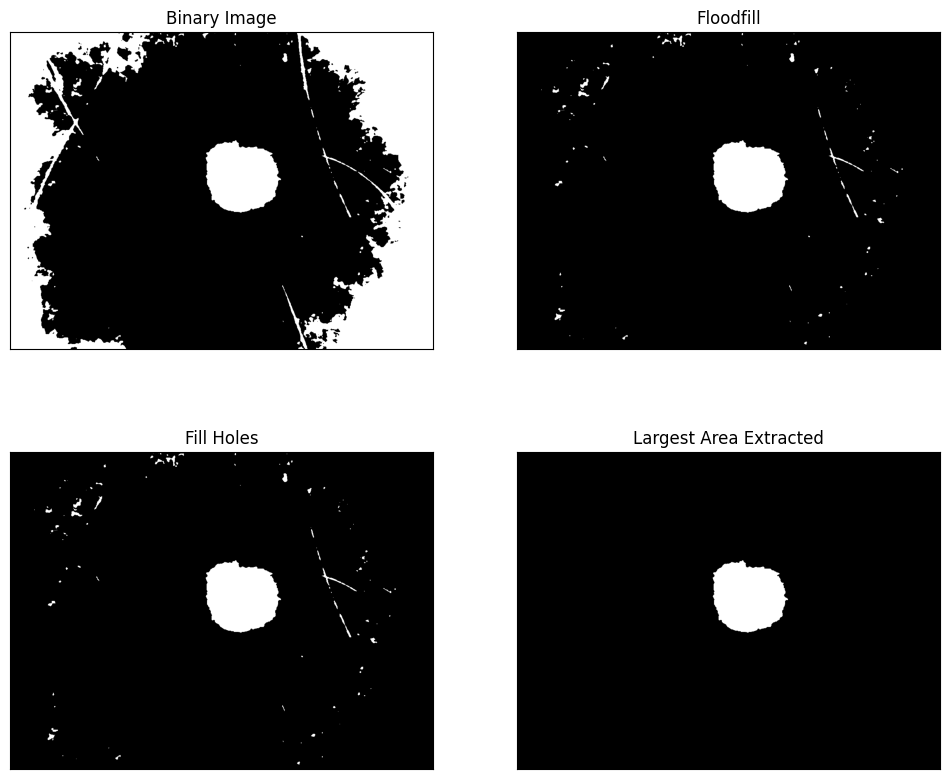

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(221), plt.imshow(binary,cmap='gray')
plt.title('Binary Image')
plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(thresh,cmap='gray')
plt.title('Floodfill')
plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(filled_mask,cmap='gray')
plt.title('Fill Holes')
plt.xticks([]),plt.yticks([])

plt.subplot(224), plt.imshow(ctr_mask,cmap='gray')
plt.title('Largest Area Extracted')
plt.xticks([]),plt.yticks([])

plt.show()


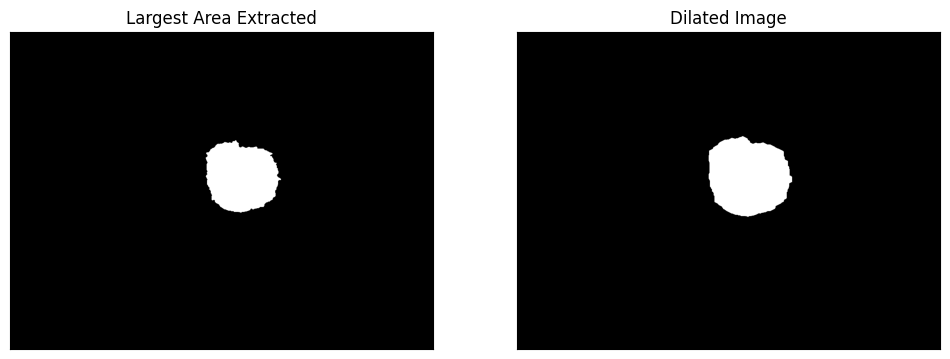

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(ctr_mask,cmap='gray')
plt.title('Largest Area Extracted')
plt.xticks([]),plt.yticks([])

plt.subplot(122), plt.imshow(dilation,cmap='gray')
plt.title('Dilated Image')
plt.xticks([]),plt.yticks([])
plt.show()

In [30]:
# plt.figure(figsize=(15,5))
# plt.subplot(241), plt.imshow(img,cmap='gray')
# plt.title('Grayscaled Image')
# plt.xticks([]),plt.yticks([])

# plt.subplot(242), plt.imshow(blur,cmap='gray')
# plt.title('After Gaussian Blur')
# plt.xticks([]),plt.yticks([])

# plt.subplot(243), plt.imshow(img_contrast,cmap='gray')
# plt.title('Scaled Image')
# plt.xticks([]),plt.yticks([])

# plt.subplot(244), plt.imshow(binary,cmap='gray')
# plt.title('Binary Image')
# plt.xticks([]),plt.yticks([])

# plt.subplot(245), plt.imshow(thresh,cmap='gray')
# plt.title('Floodfill')
# plt.xticks([]),plt.yticks([])

# plt.subplot(246), plt.imshow(filled_mask,cmap='gray')
# plt.title('Filled Holes')
# plt.xticks([]),plt.yticks([])

# plt.subplot(222), plt.imshow(ctr_mask,cmap='gray')
# plt.title('Largest Area Extracted')
# plt.xticks([]),plt.yticks([])

# plt.subplot(248), plt.imshow(dilation,cmap='gray')
# plt.title('Dilated Image')
# plt.xticks([]),plt.yticks([])
# plt.show()


1


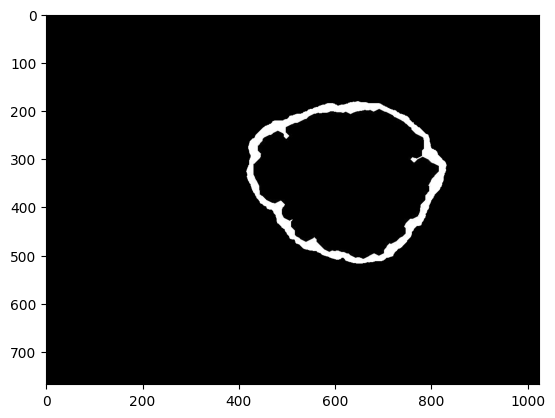

2


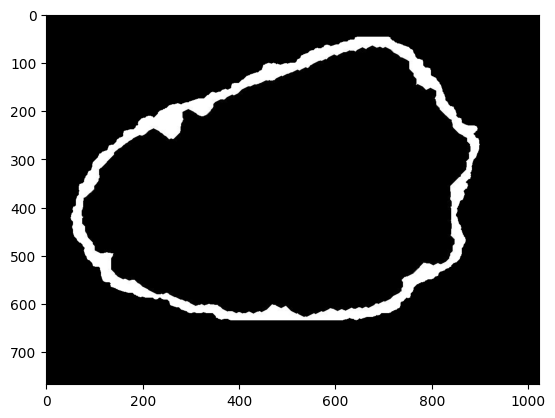

3


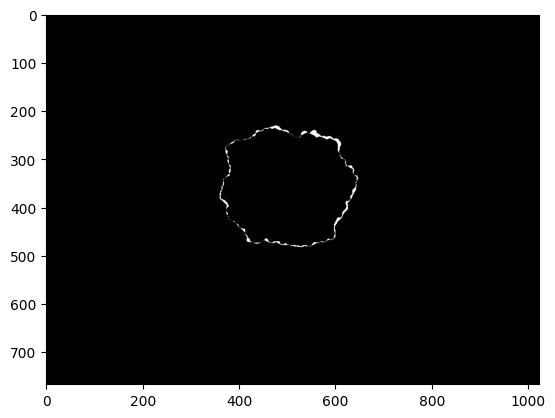

4


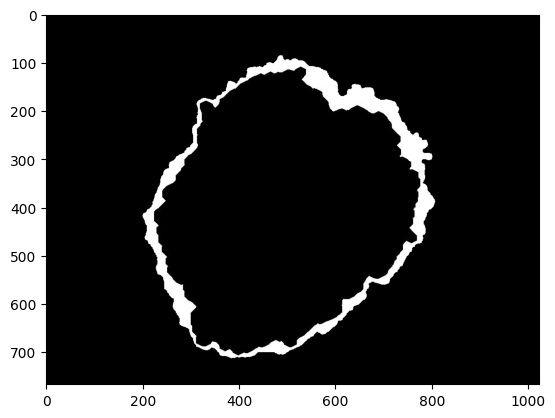

5


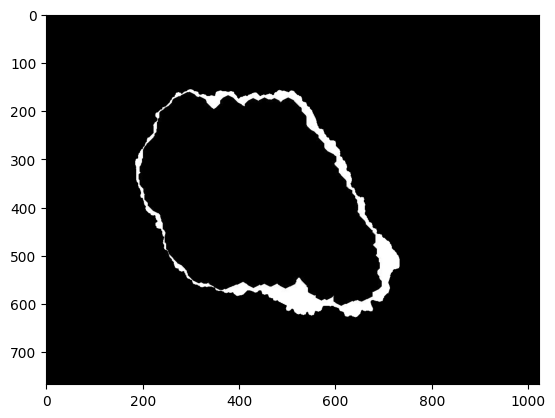

6


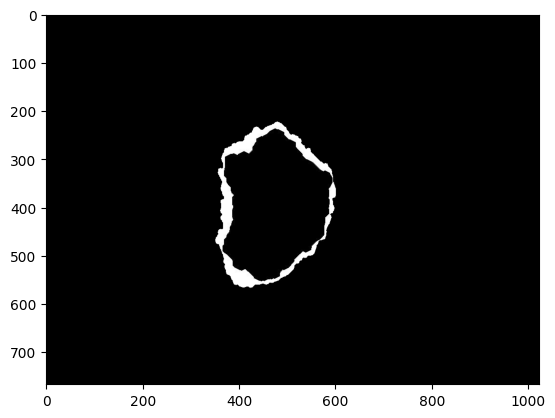

7


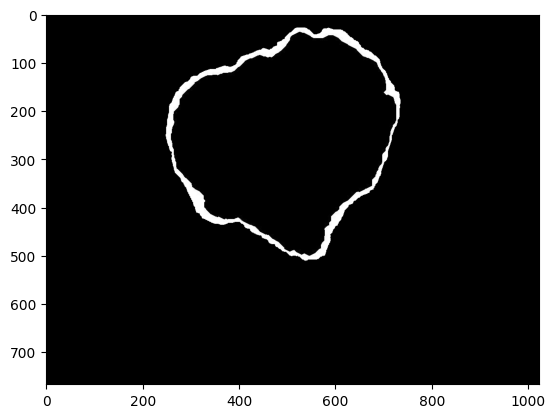

8


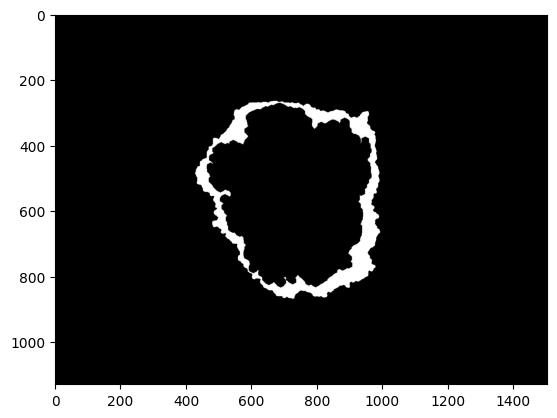

9


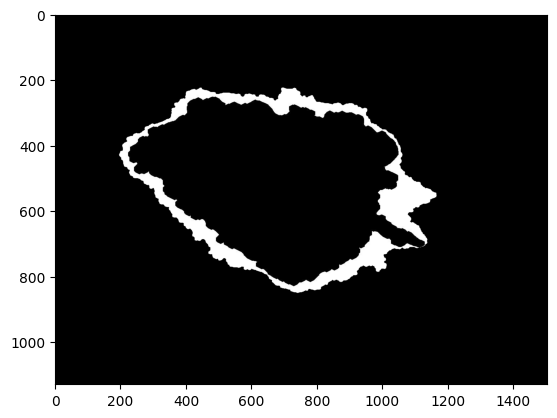

10


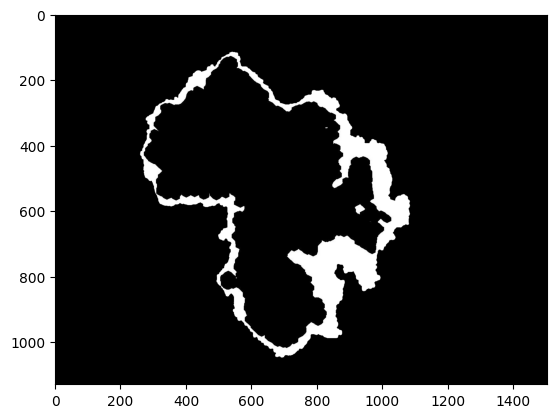

11


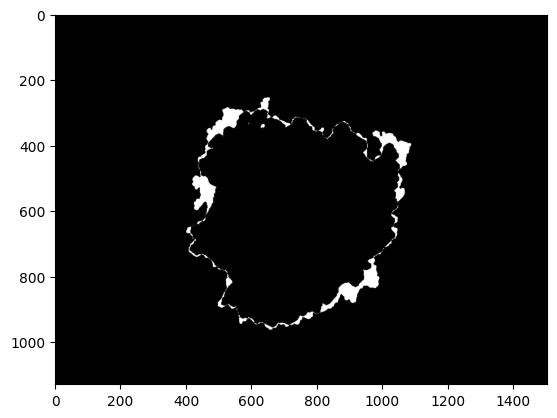

12


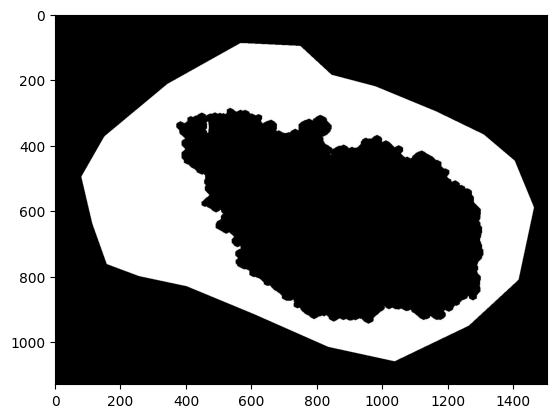

13


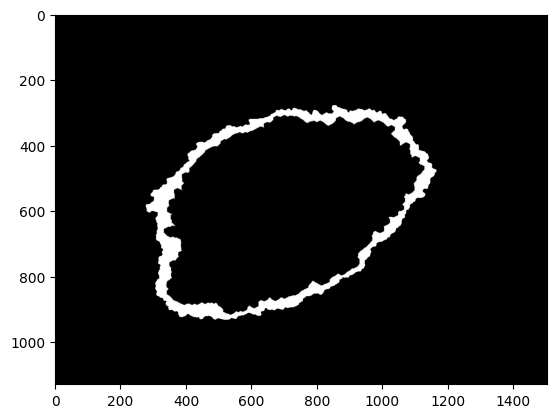

14


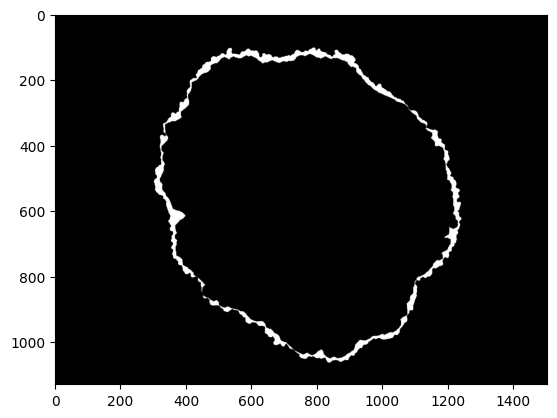

15


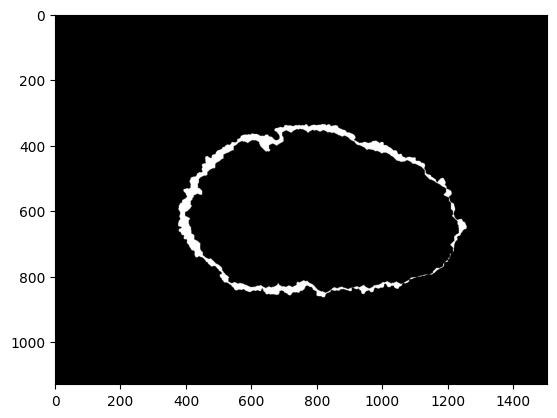

16


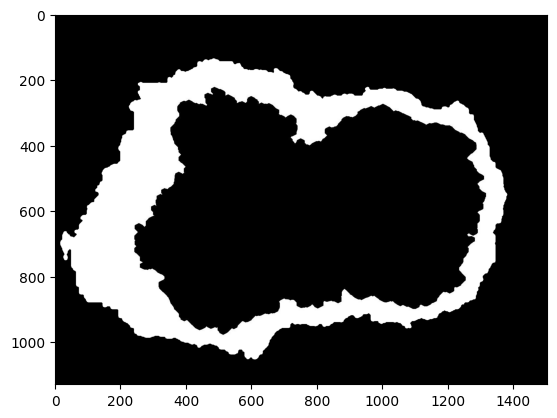

17


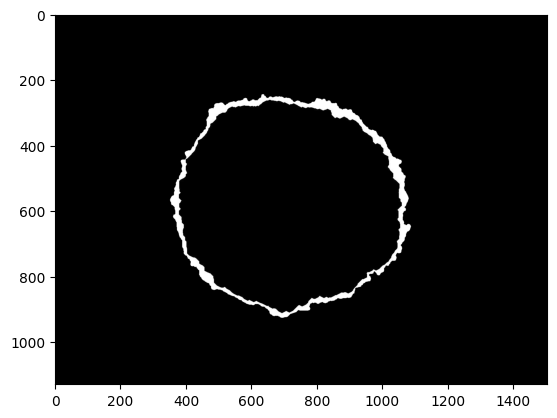

18


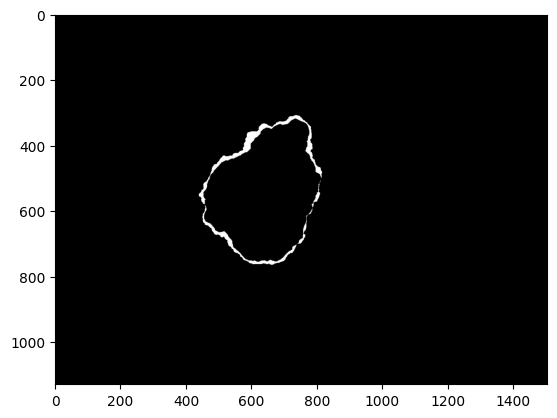

19


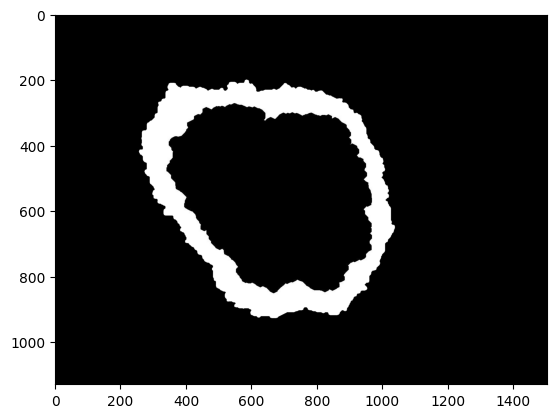

20


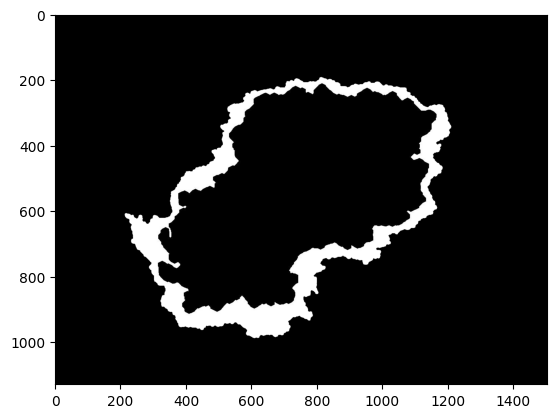

21


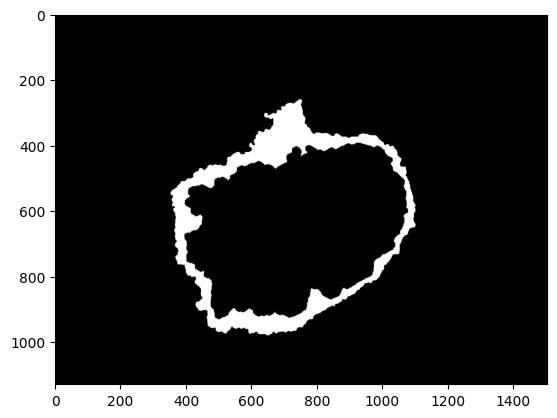

22


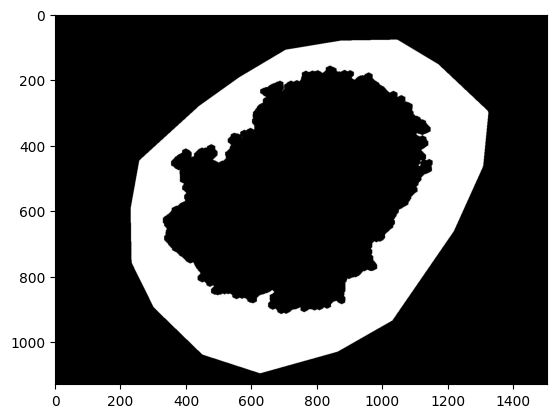

23


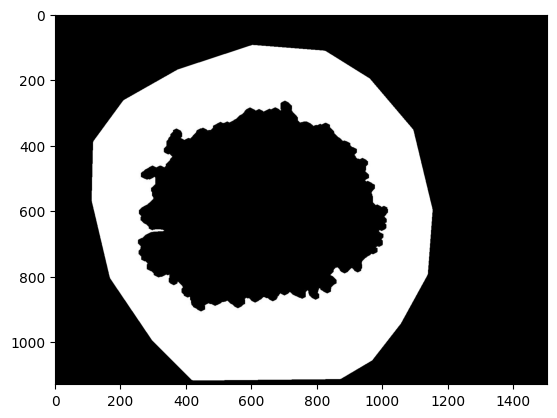

24


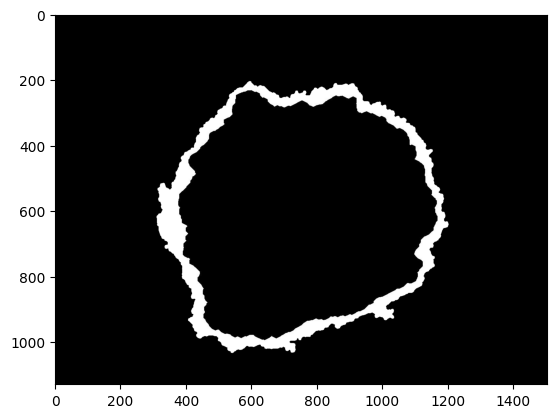

25


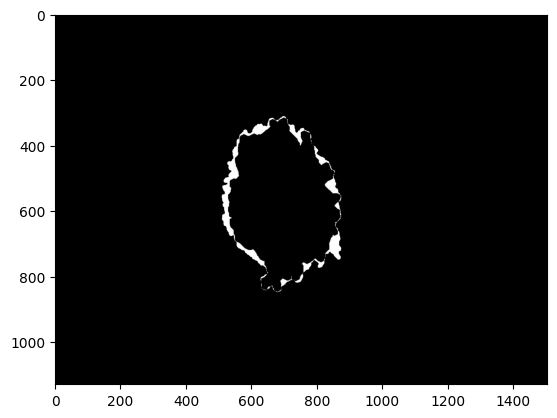

26


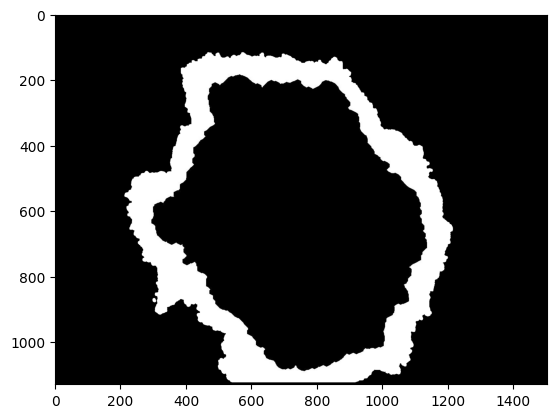

27


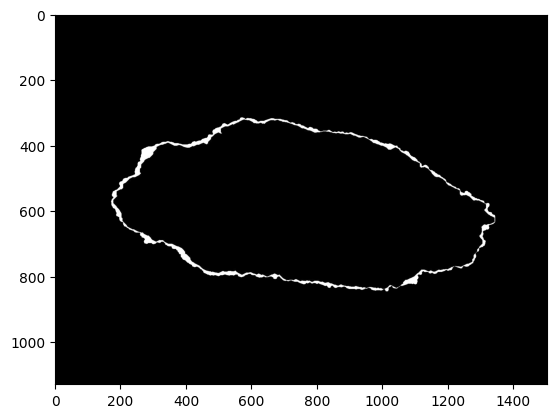

28


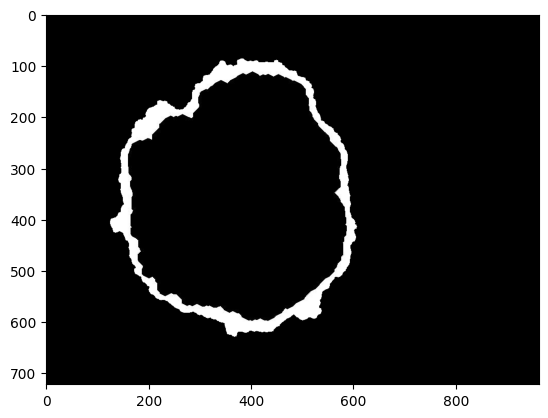

29


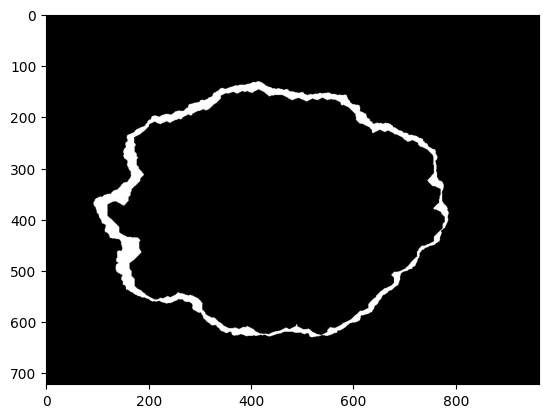

30


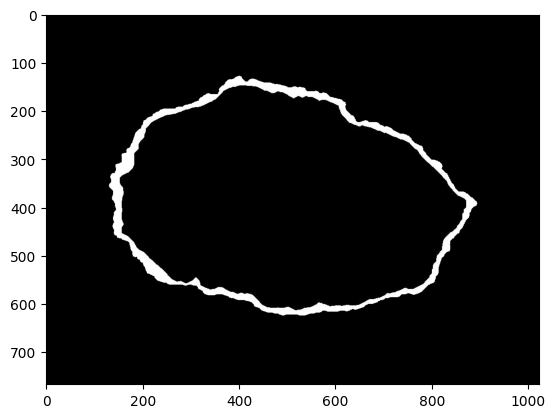

31


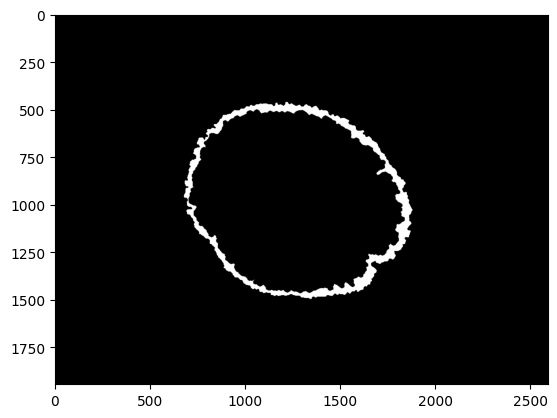

32


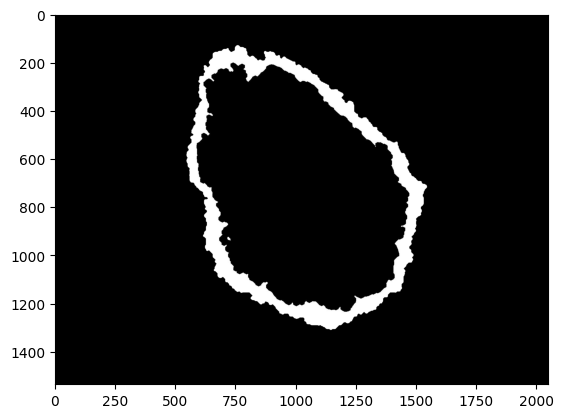

33


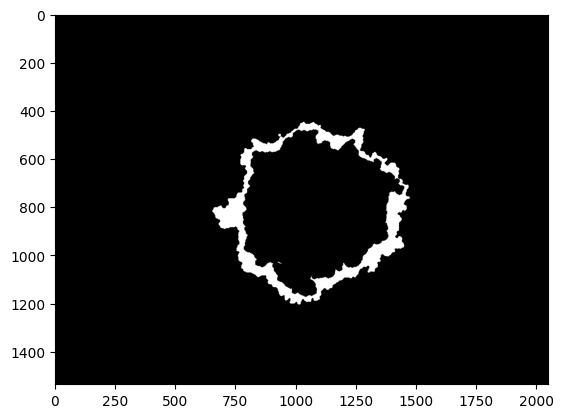

34


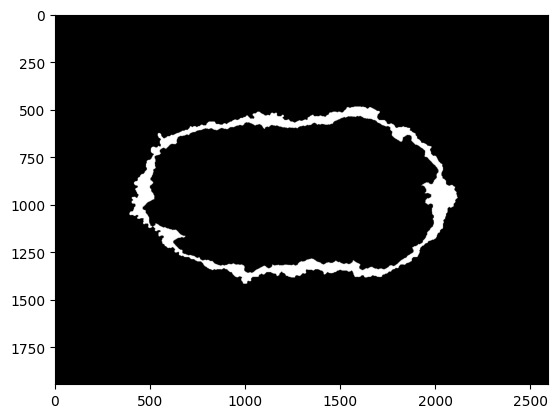

35


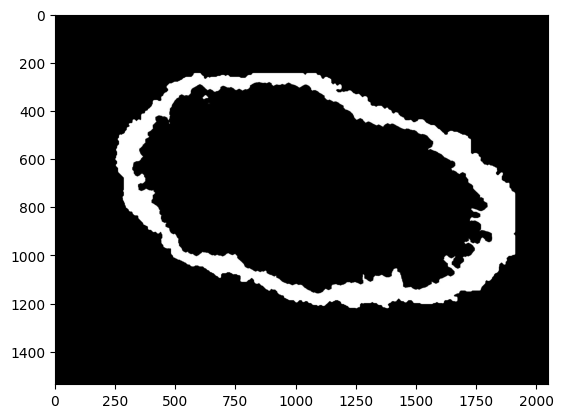

36


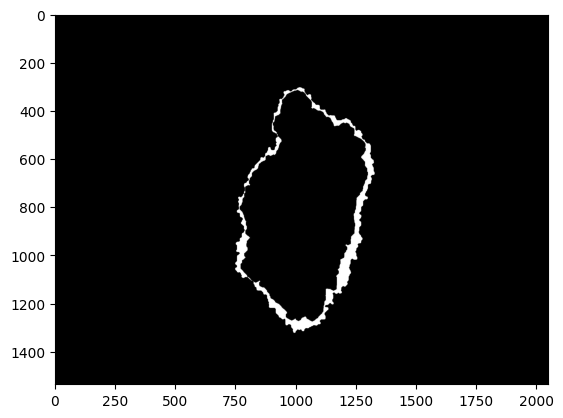

37


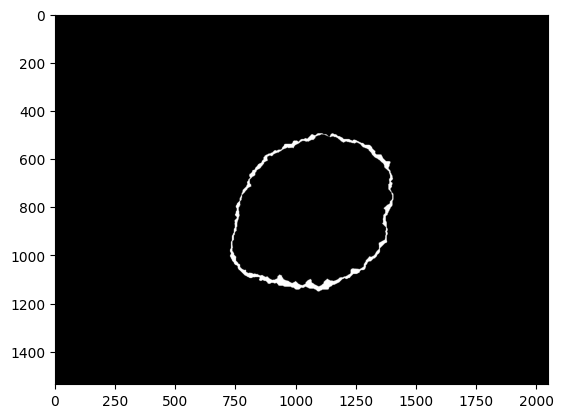

38


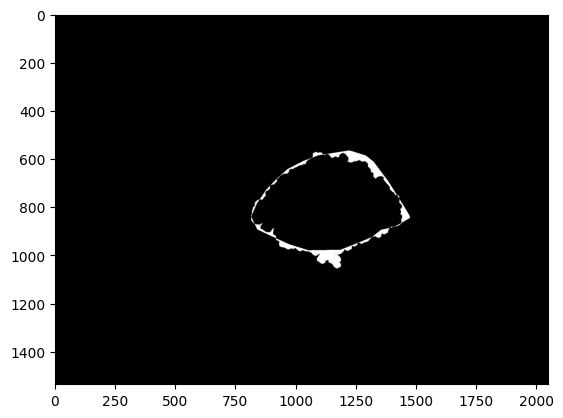

39


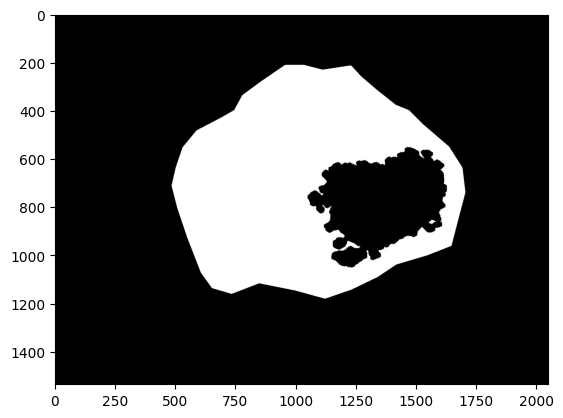

40


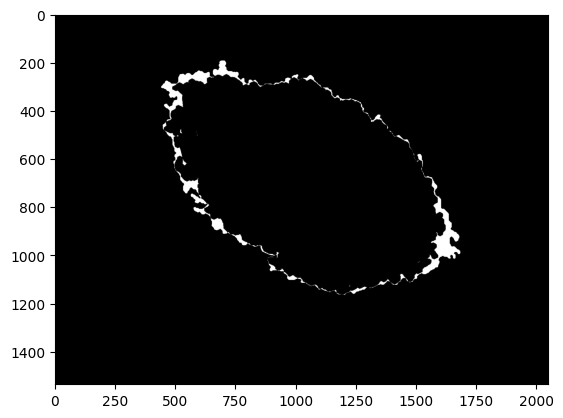

41


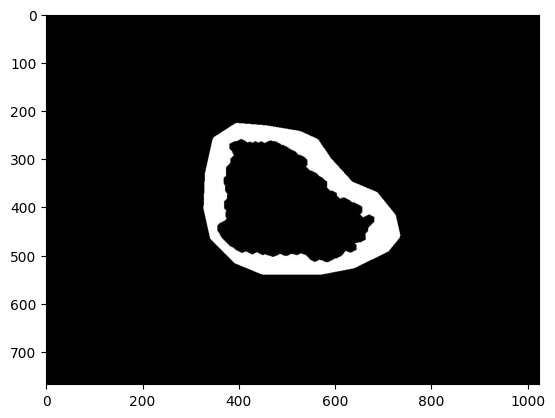

42


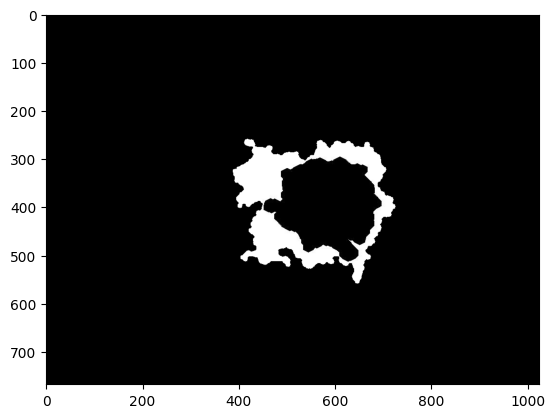

43


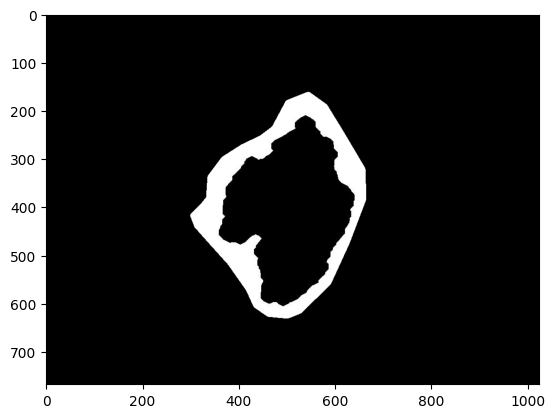

44


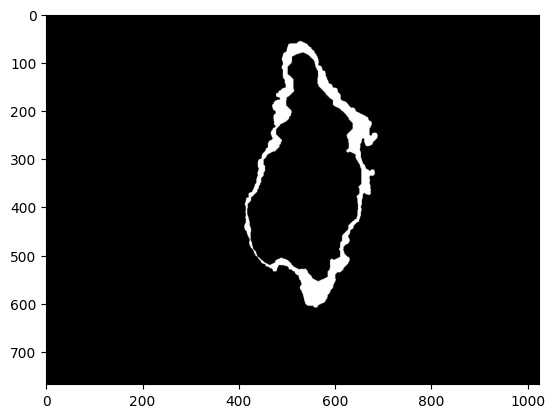

45


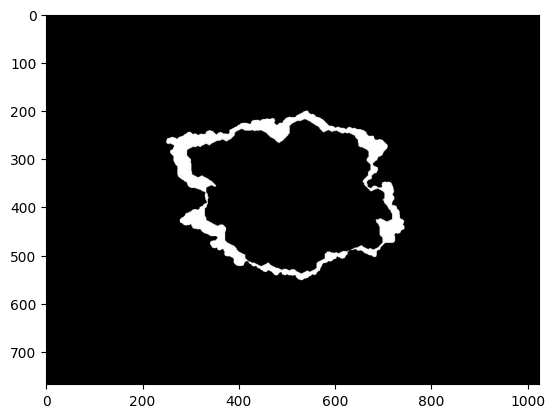

46


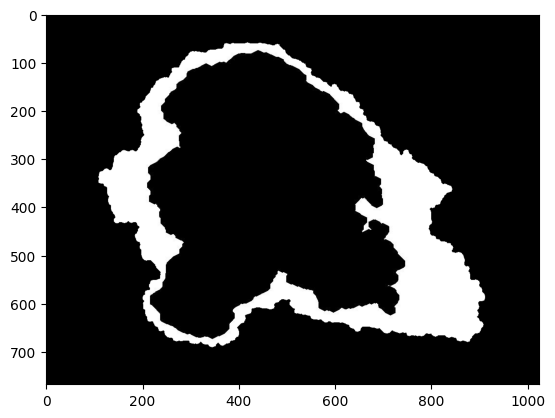

47


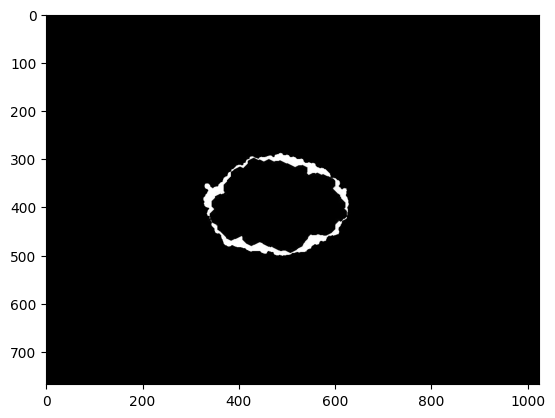

48


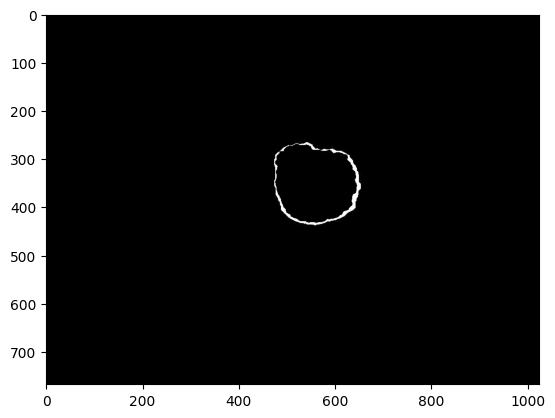

49


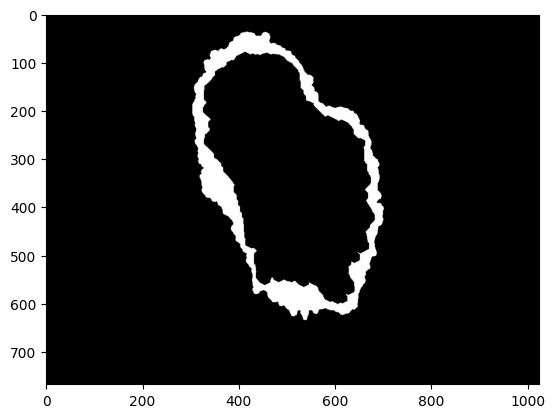

50


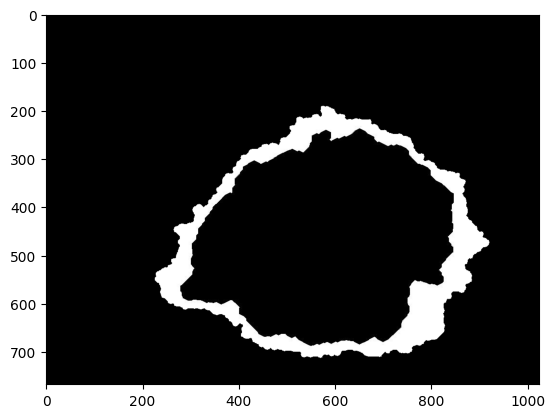

In [31]:
for i in range (1,10):
    print(i)
    img_gt = cv2.imread(groundtruth_dir + f'/SL_GT_00{i}.png')
    img_out = cv2.imread(output_dir + f'/SL00{i}.jpg')

    xor_op = cv2.bitwise_xor(img_out,img_gt)
    plt.imshow(xor_op,cmap='gray')
    plt.show()

for i in range (10,51):
    print(i)
    img_gt = cv2.imread(groundtruth_dir + f'/SL_GT_0{i}.png')
    img_out = cv2.imread(output_dir + f'/SL0{i}.jpg')

    xor_op = cv2.bitwise_xor(img_out,img_gt)
    plt.imshow(xor_op,cmap='gray')
    plt.show()

References:
https://stackoverflow.com/questions/47483411/python-and-opencv-how-do-i-convert-the-all-of-the-background-of-this-image-to-o/47483538#47483538